# STAT 207 Lab 10 - Individual Part - [25 total points]

## Logistic Regression and Classifiers

Due: Tuesday, November 2 11:59pm CST

## <u>Case Study</u>: Predicting Airbnb Superhost Status

Suppose that you have a spare room in your house (in Seattle) and you are considering advertising this room to guests on Airbnb. Airbnb superhosts are considered to be experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests. Once a host reaches Superhost status, a superhost badge will automatically appear on their listing and profile to help guests identify them. You would like to assess your chances of being named a superhost with your property.

The following dataset is a sample (assume random) of available Airbnb listings in Seattle, WA. These listings were collected in January 2016, and filtered to just contain listings from the five most popular Seattlbe neighborhoods (for Airbnb listings) and just contain listings that are either in a house or apartment property.

This dataset contains the following variables.

**Listing Information**
The dataset contains the following information about the Airbnb *listing*:
* <u>price</u>: price of the listing (per night)(in US dollars)
* <u>review_scores_rating</u>: the average rating of the listing [0,100] (100 is the best)
* <u>number_of_reviews</u>: the number of reviews for the listing
* <u>security_deposit</u>: the security deposit required for the listing (in US dollars)
* <u>cleaning_fee</u>: the cleaning fee required for the listing (in US dollars)
* <u>neighborhood</u>: the neighborhood of Seattle the listing is located in
* <u>property_type</u>: is the listing in a 'House' or 'Apartment'
* <u>room_type</u>: is the listing a 'Entire home/apt', 'Private room', or 'Shared room'
* <u>accommodates</u>: how many guests will the listing accommodate
* <u>bathrooms</u>:how many bathrooms does the listing have
* <u>beds</u>: how many beds does the listing have

**Host Information**
The dataset also contains the following information about the *host* of the given Airbnb listing:
* <u>host_is_superhost</u>: is the host a "superhost": t=True, f=False
* <u>host_has_profile_pic</u>: does the host have a profile pic in their bio: t=True, f=False
* <u>host_response_time</u>: how fast will the host respond to requests (on average)
* <u>host_acceptance_rate</u>: what percent of booking requests will the host accept


<p>&nbsp;</p>
<table style="border: none;border-collapse: collapse;width:102pt;">
    <tbody>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;width:51pt;">Problem</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;border-left:none;width:51pt;">Points</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.5</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.1.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.1.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.1.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.1.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2.5</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.3.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.3.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.3.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.1.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.1.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.1.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.1.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.1.5</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:left;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
    </tbody>
</table>




### Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Data Processing and Cleaning

First, read the seattle_airbnb_listings_cleaned.csv file into a dataframe. This csv file does not contain any missing values.

In [4]:
df = pd.read_csv('seattle_airbnb_listings_cleaned.csv')

In [5]:
df

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.00,1,t,t,t
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.00,1,f,t,t
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.00,1,f,t,t
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.00,1,t,t,t
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.00,1,t,t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,250,95,4,250,100,Fremont,House,Entire home/apt,16,3.5,10,within a few hours,0.97,1,f,t,t
335,125,95,12,150,45,Fremont,Apartment,Entire home/apt,2,1.0,1,within a few hours,1.00,1,t,t,t
336,100,98,10,200,89,Fremont,Apartment,Entire home/apt,6,1.0,2,within an hour,1.00,1,f,t,t
337,175,96,29,500,95,Fremont,House,Entire home/apt,6,2.0,3,within a few hours,1.00,1,f,t,t


## 2. Associations with Super Host Status

In this analysis we will be building several logistic regression models. Each of these logistic regression models will predict the likelihood that a Seattle Airbnb host is a superhost.

To get a sense as to what explanatory variables to use in this model let's analyze the relationships between the **host_is_superhost** categorical variable and some of the other variables in the dataset.

### 2.1. Side-by-side boxplots

#### 2.1.1. Super Host Status and Price

Use a side-by-side boxplots visualization to visualize the relationship between a host's listing price and their superhost status.

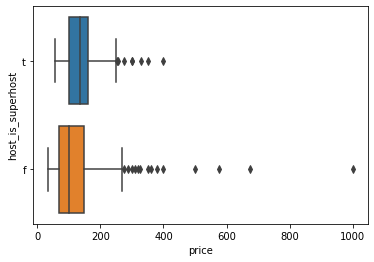

In [6]:
sns.boxplot(x='price', y='host_is_superhost', data=df, order=['t','f'])
plt.show()

#### 2.1.2. Super Host Status and Review Score's Rating

Use a side-by-side boxplots visualization to visualize the relationship between a host's review score rating and their superhost status.

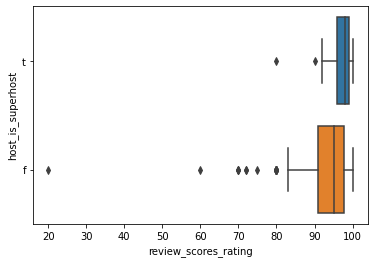

In [7]:
sns.boxplot(x='review_scores_rating', y='host_is_superhost', data=df, order=['t','f'])
plt.show()

#### 2.1.3. Super Host Status and Number of Reviews

Use a side-by-side boxplots visualization to visualize the relationship between the number of reviews for a hosts listing and their superhost status.

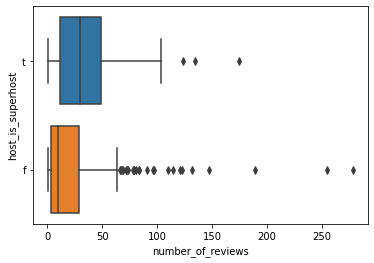

In [8]:
sns.boxplot(x='number_of_reviews', y='host_is_superhost', data=df, order=['t','f'])
plt.show()

### 2.2. Barplots

#### 2.2.1. Super Host Status and Neighborhood

Use a barplot visualization to visualize the relationship between a host's superhost status and the neighborhood that their property is located in.

This plot should display the following percentages:
* the percentage of Belltown property owners that are superhosts
* the percentage of Belltown property owners that are not superhosts
* the percentage of Broadway property owners that are superhosts
* the percentage of Broadway property owners that are not superhosts
* the percentage of Minor property owners that are superhosts
* the percentage of Minor property owners that are not superhosts
* the percentage of Fremont property owners that are superhosts
* the percentage of Fremont property owners that are not superhosts
* the percentage of Wallingford property owners that are superhosts
* the percentage of Wallingford property owners that are not superhosts

In [9]:
df2 = df.groupby(['neighborhood'])['host_is_superhost'].value_counts(normalize=True)
print(df2)

neighborhood  host_is_superhost
Belltown      f                    0.526316
              t                    0.473684
Broadway      f                    0.808333
              t                    0.191667
Fremont       f                    0.765957
              t                    0.234043
Minor         f                    0.551020
              t                    0.448980
Wallingford   f                    0.727273
              t                    0.272727
Name: host_is_superhost, dtype: float64


#### 2.2.2 Interpretation

Is there a relationship between the superhost status of a host and the neighborhood that their property is located in *in this dataset*? Which neighborhood has the highest percentage of their hosts as superhosts?

#### 2.2.3. Super Host Status and Property Type

Use a barplot visualization to visualize the relationship between a host's superhost status and the property type

This plot should display the following percentages:
* the percentage of house property owners that are superhosts
* the percentage of house property owners that are not superhosts
* the percentage of apartment property owners that are superhosts
* the percentage of apartment property owners that are not superhosts

#### 2.2.4 Interpretation

Based on your plots from 2.2.1 and 2.2.3, which variable has a stronger association with superhost status: neighborhood or property type?

## 3. <u>Model 1</u>: Fitting and Interpreting Logistic Regression Model 1

First, we would like to fit a logistic regression model that will predict the probability that a given Airbnb listing host **is a superhost**, given the following explanatory variables:
* listing price
* review scores rating
* number of reviews
* neighborhod
* property type

### 3.1. Fitting the model

Fit this logistic regression model below and display the summary output table.

In [10]:
df['superhosts']=df['host_is_superhost'].map({'f':0,'t':1})
df['superhosts']

0      1
1      0
2      0
3      1
4      1
      ..
334    0
335    1
336    0
337    0
338    0
Name: superhosts, Length: 339, dtype: int64

In [11]:
mod1 = smf.logit(formula='superhosts ~ price + review_scores_rating + number_of_reviews + neighborhood + property_type', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.490114
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             superhosts   No. Observations:                  339
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            8
Date:                Mon, 01 Nov 2021   Pseudo R-squ.:                  0.1954
Time:                        11:06:57   Log-Likelihood:                -166.15
converged:                       True   LL-Null:                       -206.49
Covariance Type:            nonrobust   LLR p-value:                 3.574e-14
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -27.8074      5.148     -5.402      0.000     -37.896     -17.718
neighborhood[T.Broadway]       -1.1046      0.393     -2.813      0.005      -1.874      -0.335
neighborhood[T.Fremont]        -0.7215      0.492     -1.467      0.142      -1.685       0.242
neighborhood[T.Minor]           0.0272      0.490      0.056      0.956      -0.933       0.987
neighborhood[T.Wallingford]    -0.4037      0.472     -0.855      0.392      -1.329       0.521
property_type[T.House]         -0.3405      0.338     -1.009      0.313      -1.002       0.321
price                           0.0013      0.001      0.924      0.356      -0.001       0.004
review_scores_rating            0.2792      0.052      5.333      0.000       0.177       0.382
number_of_reviews               0.0182      0.004      4.470      0.000       0.010       0.026
===============================================================================================
"""

### 3.2. Logistic Regression Model Output

Write out the logistic regression model equation. Make sure to use the correct notation.

$log(\frac{\hat{p}}{1-\hat{p}})$ = -27.8074 -1.1046neighborhood[T.Broadway] -0.7215neighborhood[T.Fremont] + 0.0272neighborhood[T.Minor] - 0.4037neighborhood[T.Wallingford] - 0.3405property_type[T.House] + 0.0013price + 0.2792review_scores_rating + 0.0182number_of_reviews

### 3.3. Intercept Interpretation

If $\hat{\beta}_0$ is your intercept, calculate $e^{\hat{\beta}_0}$ and put it into words. **Make sure to not use causal language!**

In [12]:
e_b0 = np.exp(-27.8074)
e_b0

8.383003045266744e-13

We would expect the odds that a given Airbnb host is a superhost when all covariants are 0 is 8.383003045266744e-13.

### 3.4. Numerical Explanatory Variable Slope Interpretation

If $\hat{\beta}_i$ is your slope that corresponds to listing price, calculate $e^{\hat{\beta}_i}$ and put it into words. **Make sure to not use causal language!**

In [13]:
e_price = np.exp(0.0013)
e_price

1.0013008453662857

We would expect the odds that a given Airbnb host is a superhost increase by a factor of 1.0013 on average if the price of the Airbnb increases.

### 3.5. Indicator Variable Slope Interpretation

If $\hat{\beta}_j$ is your slope that corresponds to the property_type[HOUSE] indicator variable, then calculate $e^{\hat{\beta}_j}$ and put it into words. **Make sure to not use causal language!**

In [14]:
e_proptype = np.exp(-0.3405)
e_proptype

0.711414526557692

We would expect the odds that a given Airbnb host is a superhost increase by a factor of 0.7114 on average if the Airbnb is a house.

## 4. <u>Model 1</u>: Conducting Inference on the Slopes of Model 1

We would like to conduct inference on the **price slope** in the population logistic regression model that corresponds to our model 1.  We would also like to conduct inference on the **odds multiplier for price** in the population logistic regression model that corresponds to our model 1.

### 4.1. 90% Confidence Intervals

#### 4.1.1. Confidence Interval for Slope

First, create a 90% confidence interval for the **price** slope (ie. a $\beta_i$) in the population logistic regression model that corresponds to our model 1.

In [15]:
point_estimate=0.0013
print('Point Estimate', point_estimate)

Point Estimate 0.0013


In [16]:
standard_error=0.001
print('Standard Error:', standard_error)

Standard Error: 0.001


In [17]:
from scipy.stats import norm
critical_value=norm.ppf(0.95)
print("Critical Value", critical_value)

Critical Value 1.6448536269514722


In [18]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('90% Confidence Interval for Age Population Slope:', lower_bound, upper_bound)

90% Confidence Interval for Age Population Slope: -0.0003448536269514723 0.0029448536269514724


#### 4.1.2. Slope Confidence Interval in Words

Put this confidence interval from 4.1.1 into words.

We are 90% confident that $\beta_i$, the population slope for price in the logistic regression model is between -0.000344 and 0.002945.

#### 4.1.3. Confidence Interval for the Odds Multiplier

Then, create a 90% confidence interval for the **odds multiplier for price** in the population logistic regression model that corresponds to our model 1.

In [19]:
print('90% Confidence Interval for Age Odds Multiplier:', np.exp(lower_bound), np.exp(upper_bound))

90% Confidence Interval for Age Odds Multiplier: 0.9996552058282259 1.002949193967904


#### 4.1.4. Odds Multiplier Confidence Interval in Words

Put this confidence interval from 4.1.3 into words.

We are 90% confident that $e^{\beta_i}$ is between 0.9997 and 1.0029 in the population logistic regression model that predicts the probability of the price of an Airbnb.

### 4.2. Hypothesis Testing for the Population Slope

Next, we would like to test if we have enough evidence to suggest the slope for price is non-zero in the population model.

#### 4.2.1. Hypotheses

Set up the hypotheses for this test below. Make sure you define any parameters that you use.

$H_0: \beta_i=0$

$H_A: \beta_i\neq 0$.

#### 4.2.2. Test Statistic

Use the summary output table to calculate the test statistic for this test **by hand**. You can use the summary output table to check your work, but it may be a bit different due to rounding errors.

In [20]:
test_statistic= point_estimate / standard_error
print('Test Statistic:', test_statistic)

Test Statistic: 1.2999999999999998


#### 4.2.3. p-value

Use your test statistic that you calculated in 4.2.2. to calculate the p-value for this test **by hand**. You can use scipy.stats functions to help you. Again, you can use the summary output table to check your work, but it may be a bit different due to rounding errors.

In [53]:
from scipy.stats import norm
pvalue=2*(1-norm.cdf(np.abs(test_statistic)))
print('p-value: ',pvalue)

p-value:  0.19360096917122083


#### 4.2.4. Conclusions with a p-value

Use your p-value and a significance level of $\alpha=0.10$ to make a conclusion about your hypotheses in 4.2.1.

Since the p-value = 0.194 > 0.10, we fail to reject the null. Therefore there is not sufficient evidence to suggest that the population slope in this model is non-zero.

#### 4.2.5. Conclusions with a confidence interval

Use the appropriate 90% confidence interval to make a conclusion about your hypotheses in 4.2.1.

Because the null value is in our 90% confidence interval, we fail to reject the null hypothesis. Therefore there is not sufficient evidence to suggest that the population slope in this model is non-zero.

### 4.3. Hypothesis Testing for the Population Odds Multiplier

Next, we would like to test if we have enough evidence to suggest odds multiplier for price is not equal to 1 in the population model.

#### 4.3.1. Hypotheses

Set up the hypotheses for this test below. Make sure you define any parameters that you use.

$H_0: e^{\beta_i}=1$

$H_A: e^{\beta_i}\neq 1$.

#### 4.3.2. Conclusion with a p-value

Use a p-value and a significance level of $\alpha=0.10$ to make a conclusion about your hypotheses in 4.4.1.

Because our p-value = 0.193 > 0.10, we fail to reject the null hypothesis. Thus, there is not sufficient evidence to suggest that the population odds multiplier for age in this model is not equal to 1.

#### 4.3.3. Conclusion with a confidence interval

Use the appropriate 90% confidence interval to make a conclusion about your hypotheses in 4.3.1.


Because the null value $e^{\beta_i}=1$ is in our 90% confidence interval for $e^{\beta_i}$, we fail to reject the null hypothesis. Thus there is not sufficient evidence to suggest that the population odds multiplier for this model is not equal to 1.

## 5. Using Model 1 as a Classifier Model

Next, we would like to use model 1 as a classifier model which will classify a given Seattle Airbnb host as a superhost or non-superhost. Using model 1, we will make two classifications of the observations in the dataset.
1. One classification will use a predictive probability threshold of $p_0=0.6$.
2. The other classification will use a predictive probability threshold of $p_0=0.2$.


### 5.1. <u>Classification A</u> - Using Logistic Regression Model 1 and $p_0=0.6$

#### 5.1.1. Classify the Observations in the Dataset
Use this predictive probability threshold of $p_0=0.6$ and your logistic regression model 1 to classify each of the observations in your dataset. Add these predicted classifications as a column in your dataframe and display your updated dataframe.

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

pred_probabilities=mod1.predict(exog=dict(df)) 
df['predictive_prob']=pred_probabilities
df

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,superhosts,predictive_prob
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.00,1,t,t,t,1,0.548995
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.00,1,f,t,t,0,0.266050
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.00,1,f,t,t,0,0.467789
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.00,1,t,t,t,1,0.435316
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.00,1,t,t,t,1,0.454067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,250,95,4,250,100,Fremont,House,Entire home/apt,16,3.5,10,within a few hours,0.97,1,f,t,t,0,0.124934
335,125,95,12,150,45,Fremont,Apartment,Entire home/apt,2,1.0,1,within a few hours,1.00,1,t,t,t,1,0.164483
336,100,98,10,200,89,Fremont,Apartment,Entire home/apt,6,1.0,2,within an hour,1.00,1,f,t,t,0,0.297960
337,175,96,29,500,95,Fremont,House,Entire home/apt,6,2.0,3,within a few hours,1.00,1,f,t,t,0,0.212200


In [23]:
df['yhat']=1*(df['predictive_prob']>0.6)
df

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,superhosts,predictive_prob,yhat
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.00,1,t,t,t,1,0.548995,0
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.00,1,f,t,t,0,0.266050,0
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.00,1,f,t,t,0,0.467789,0
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.00,1,t,t,t,1,0.435316,0
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.00,1,t,t,t,1,0.454067,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,250,95,4,250,100,Fremont,House,Entire home/apt,16,3.5,10,within a few hours,0.97,1,f,t,t,0,0.124934,0
335,125,95,12,150,45,Fremont,Apartment,Entire home/apt,2,1.0,1,within a few hours,1.00,1,t,t,t,1,0.164483,0
336,100,98,10,200,89,Fremont,Apartment,Entire home/apt,6,1.0,2,within an hour,1.00,1,f,t,t,0,0.297960,0
337,175,96,29,500,95,Fremont,House,Entire home/apt,6,2.0,3,within a few hours,1.00,1,f,t,t,0,0.212200,0


#### 5.1.2. Confusion Matrix

Use this classification of the dataset observations in 5.1.1 to create a confusion matrix.

In [25]:
tn, fp, fn, tp = confusion_matrix(y_true=df['superhosts'], 
                                  y_pred=df['yhat']).ravel()
(tn, fp, fn, tp)

(231, 7, 81, 20)

#### 5.1.3. Interpretation of Confusion Matrix

* How many true negatives are in this classification? What does a "true negative" represent in this problem?
* How many false positives are in this classification? What does a "false positive" represent in this problem?
* How many false negatives are in this classification? What does a "false negative" represent in this problem?
* How many true positives are in this classification? What does a "true positive" represent in this problem?

1. There are 231 true negatives. This means that the observation is predicted to not be a superhost and it is actually the case that it is not a superhost.
2. There are 7 false positives. This means that the observation is predicted to not be a superhost and it is actually the case that it is a superhost.
3. There are 81 false negatives. This means that the observation is predicted to be a superhost but it is actually not a superhost.
4. There are 20 true positives. This means that the observation is predicted to be a superhost and it is actually a superhost.

#### 5.1.4. Accuracy Metrics

Calculate the following for this classification of the dataset.
* sensitivity rate
* specificity rate
* false positive rate

In [26]:
sensitivity=tp/(tp+fn)
print('sensitivity:', sensitivity)

sensitivity: 0.19801980198019803


In [27]:
specificity=tn/(tn+fp)
print('specificity:', specificity)

specificity: 0.9705882352941176


In [28]:
false_positive_rate=fp/(tn+fp)
print('false positive rate:', false_positive_rate)

false positive rate: 0.029411764705882353


#### 5.1.5. Interpretation of Accuracy Metrics

Which type of host was our classifier model better at correctly classifying: hosts that are *actually not* super hosts, or hosts that *actually are* super hosts? Explain.

Hosts that are actually not superhosts

### 5.2. <u>Classification B</u> - Using Logistic Regression Model 1 and $p_0=0.2$

Next, classify the observations in the dataset using model 1 and a predictive probability threshold of $p_0=0.2$. Calculate the sensitivity rate and specificity rate for this classification as well.

In [33]:
df['yhat_0.2']=1*(df['predictive_prob']>0.2)
df

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,...,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,superhosts,predictive_prob,yhat,yhat_0.3,yhat_0.2
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,...,1.00,1,t,t,t,1,0.548995,0,1,1
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,...,1.00,1,f,t,t,0,0.266050,0,0,1
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,...,1.00,1,f,t,t,0,0.467789,0,1,1
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,...,1.00,1,t,t,t,1,0.435316,0,1,1
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,...,1.00,1,t,t,t,1,0.454067,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,250,95,4,250,100,Fremont,House,Entire home/apt,16,3.5,...,0.97,1,f,t,t,0,0.124934,0,0,0
335,125,95,12,150,45,Fremont,Apartment,Entire home/apt,2,1.0,...,1.00,1,t,t,t,1,0.164483,0,0,0
336,100,98,10,200,89,Fremont,Apartment,Entire home/apt,6,1.0,...,1.00,1,f,t,t,0,0.297960,0,0,1
337,175,96,29,500,95,Fremont,House,Entire home/apt,6,2.0,...,1.00,1,f,t,t,0,0.212200,0,0,1


In [34]:
tn, fp, fn, tp = confusion_matrix(y_true=df['superhosts'], 
                                  y_pred=df['yhat_0.2']).ravel()
(tn, fp, fn, tp)

(120, 118, 9, 92)

In [35]:
sensitivity=tp/(tp+fn)
print('sensitivity:', sensitivity)

sensitivity: 0.9108910891089109


In [36]:
specificity=tn/(tn+fp)
print('specificity:', specificity)

specificity: 0.5042016806722689


### 5.3. Which classification to choose?

Suppose that you work at a tourism analytics firm that helps clients make decisions about their Airbnb listings that help them maximize their listing profits. One of the services that your firm provides is predicting the likelihood that a client will quickly become a superhost, once they list a property on the market.

Clients who actually have what it takes to be named as a superhost will be more likely to keep soliciting the firm's services, and thus accurately telling them that they have a shot at becoming a superhost will keep them from pursuing another firm for help. Therefore, it is very important that your firm accurately predicts these "actual super hosts" correctly as superhosts. 

On the other hand, it is not as big of a deal if the firm incorrectly predicts quite a few hosts that will "not actually be superhosts" as being a super host.

Given these incentives for the firm, which classification threshold would you choose to use: $p_0=0.6$ or $p_0=0.2$? Explain. 

Since we want to accurately predict actual super hosts, we want to use $p_0=0.2$ because it yields a higher sensitivity of 0.91.

## 6. <u>Model 2</u>: Fitting Logistic Regression Model 2

Next, we would like to fit another logistic regression model that will predict the probability that a given Airbnb listing host **is a superhost**, given the following explanatory variables:
* price
* number of reviews
* neighborhood

### 6.1. Fitting the model

Fit this logistic regression model below and display the summary output table.

In [38]:
mod2 = smf.logit(formula='superhosts ~ price + number_of_reviews + neighborhood', data=df).fit()
mod2.summary()

Optimization terminated successfully.
         Current function value: 0.561246
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             superhosts   No. Observations:                  339
Model:                          Logit   Df Residuals:                      332
Method:                           MLE   Df Model:                            6
Date:                Mon, 01 Nov 2021   Pseudo R-squ.:                 0.07857
Time:                        11:21:35   Log-Likelihood:                -190.26
converged:                       True   LL-Null:                       -206.49
Covariance Type:            nonrobust   LLR p-value:                 1.339e-05
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6357      0.355     -1.790      0.074      -1.332       0.061
neighborhood[T.Broadway]       -1.4007      0.366     -3.824      0.000      -2.119      -0.683
neighborhood[T.Fremont]        -1.0534      0.440     -2.395      0.017      -1.915      -0.191
neighborhood[T.Minor]          -0.0457      0.396     -0.115      0.908      -0.822       0.731
neighborhood[T.Wallingford]    -0.7990      0.389     -2.053      0.040      -1.562      -0.036
price                           0.0014      0.001      1.046      0.296      -0.001       0.004
number_of_reviews               0.0109      0.003      3.214      0.001       0.004       0.018
===============================================================================================
"""

## 7. Comparing Classifier Models with ROC curves and AUC

Finally, we would like to select which model will be better (model 1 or model 2) at classifying the observations in the dataset. We will do this by comparing the ROC curves and the AUC of both of these models.

### 7.1. Model 1 ROC and AUC

First, calculate the roc curve for the model 1 being used to classify the dataset observations. Also calculate the AUC for this ROC curve.

In [39]:
fprs, tprs, thresholds = roc_curve(y_true=df['superhosts'], 
                            y_score=mod1.fittedvalues)
auc = roc_auc_score(y_true=df['superhosts'], 
                    y_score=mod1.fittedvalues)
print(auc)

0.7956360762126633


In [42]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

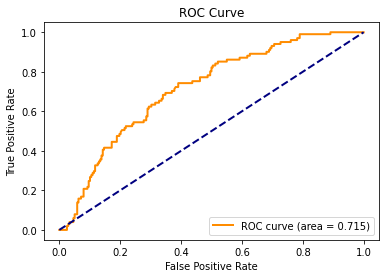

In [43]:
plot_roc(fprs, tprs, auc)

### 7.2. Model 2 ROC and AUC

Next, calculate the roc curve for the model 2 being used to classify the dataset observations. Also calculate the AUC for this ROC curve.

In [49]:
fprs2, tprs2, thresholds = roc_curve(y_true=df['superhosts'], 
                            y_score=mod2.fittedvalues)
auc2 = roc_auc_score(y_true=df['superhosts'], 
                    y_score=mod2.fittedvalues)
print(auc2)

0.7150345286629504


In [50]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

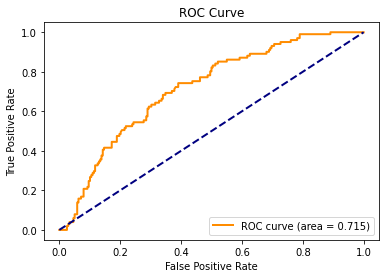

In [52]:
plot_roc(fprs2, tprs2, auc2)

### 7.3. Ideal Classifier Model

What would be the false positive rate and the true positive rate for the ideal classifier model for a given dataset?

The ideal classifier model will have a false positive rate of 0 and a true positive rate of 1.

### 7.4. Comparison of Classifications of the Observations in the Dataset with Model 1 vs. Model 2

Which of the two classifier models (one uses model 1 vs. one that uses model 2) will have a predictive probability threshold that will give us a true positive rate and false positive rate that is closer to the one described in 7.3? Explain.

Model 1 will have a predictive probability threshold that will give us a true positive rate and false positive rate closer to (0,1) because it has a higher AUC value than the AUC value in model 2.